**Table of contents**<a id='toc0_'></a>    
- 1. [Imports](#toc1_)    
- 2. [Model class](#toc2_)    
  - 2.1. [Basic Edgeworth box](#toc2_1_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## 1. <a id='toc1_'></a>[Imports](#toc0_)

In [57]:
import matplotlib.pyplot as plt

# Use latex rendering for nice plot
plt.rcParams.update({
    "axes.grid": True,
    "grid.color": "black",
    "grid.alpha": "0.25",
    "grid.linestyle": "--",
    "font.size": 14,
})


%load_ext autoreload
%autoreload 2

import numpy as np
import scipy.optimize

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 2. <a id='toc2_'></a>[Model class](#toc0_)

In [2]:
from ExchangeEconomy import ExchangeEconomyClass

### 2.1. <a id='toc2_1_'></a>[Basic Edgeworth box](#toc0_)

In [5]:
model = ExchangeEconomyClass()

1. Illustrating the set in a Edgeworth box

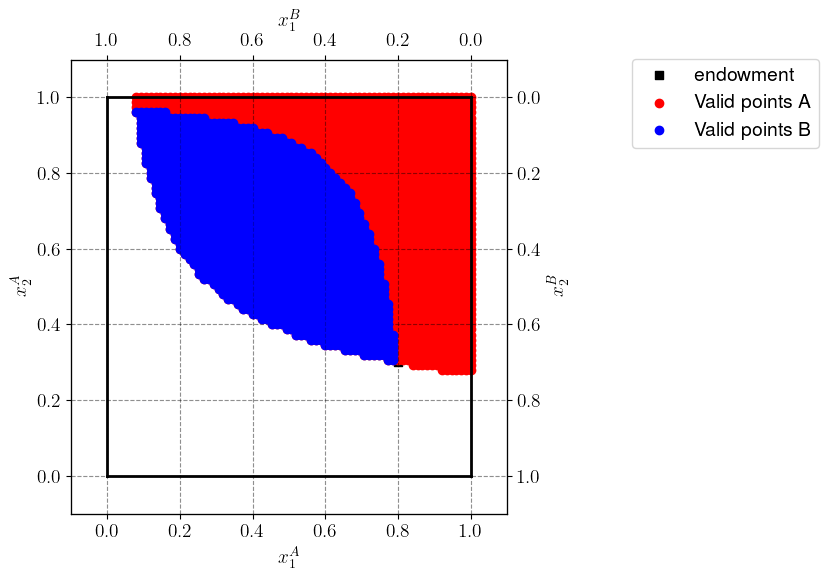

In [215]:
par = model.par

# a. total endowment
w1bar = 1.0
w2bar = 1.0

# b. figure set up
fig = plt.figure(figsize=(6,6),tight_layout=True)
ax_A = fig.add_subplot(1, 1, 1)

ax_A.set_xlabel("$x_1^A$")
ax_A.set_ylabel("$x_2^A$")

temp = ax_A.twinx()
temp.set_ylabel("$x_2^B$")
ax_B = temp.twiny()
ax_B.set_xlabel("$x_1^B$")
ax_B.invert_xaxis()
ax_B.invert_yaxis()

# A
ax_A.scatter(par.w1A,par.w2A,marker='s',color='black',label='endowment')

# Initial endowments
omega_a1 = par.w1A
omega_a2 = par.w2A
omega_b1 = 1-par.w1A
omega_b2 = 1-par.w2A

# Generate point grids
N = 75
x_a1 = np.linspace(0,1,N+1)
x_a2 = np.linspace(0,1,N+1)

# Combination for A
points_A = [
    (xA1, xA2) for xA1 in x_a1 for xA2 in x_a2 
    if model.utility_A(xA1, xA2) >= model.utility_A(omega_a1, omega_a2)
]

points_B = [
    (1 - xA1, 1 - xA2) for xA1, xA2 in points_A 
    if model.utility_B(1 - xA1, 1 - xA2) >= model.utility_B(omega_b1, omega_b2)
]

# Plot valid points
ax_A.scatter([point[0] for point in points_A], [point[1] for point in points_A], marker='o', color='red', label='Valid points A')
ax_B.scatter([point[0] for point in points_B], [point[1] for point in points_B], marker='o', color='blue', label='Valid points B')

# limits
ax_A.plot([0,w1bar],[0,0],lw=2,color='black')
ax_A.plot([0,w1bar],[w2bar,w2bar],lw=2,color='black')
ax_A.plot([0,0],[0,w2bar],lw=2,color='black')
ax_A.plot([w1bar,w1bar],[0,w2bar],lw=2,color='black')

ax_A.set_xlim([-0.1, w1bar + 0.1])
ax_A.set_ylim([-0.1, w2bar + 0.1])    
ax_B.set_xlim([w1bar + 0.1, -0.1])
ax_B.set_ylim([w2bar + 0.1, -0.1])

fig.legend(loc='upper right',bbox_to_anchor=(1.4,.9))

2. Calculate error in market clearing condition

In [153]:
P_1 = np.linspace(0.5,2.5,N+1)
eps_1,eps_2=model.market_clear_err(P_1)

# Use python-built in functions to find the minimum absolute error 
# Make sure they are the same across A/B (or very close to)
min_err1=abs(eps_1).min()
min_err2=abs(eps_2).min()
assert min_err1-min_err2<=1e-3

market_clearing_p=model.find_eq(P_1)

In [158]:
# Make larger linspace with smaller space to find (analytical) solution
P_1_analytical = np.linspace(0.5,2.5,2000)
market_clearing_p_analytical=model.find_eq(P_1_analytical)
eps_1_ana,eps_2_ana=model.market_clear_err(P_1_analytical)
min_err_analytical=abs(eps_1_ana).min()

Market clearing price p_1 in P_1 is 0.9533 with error 0.0053
"Analytical" market clearing price is 0.9442 with error 0.0001


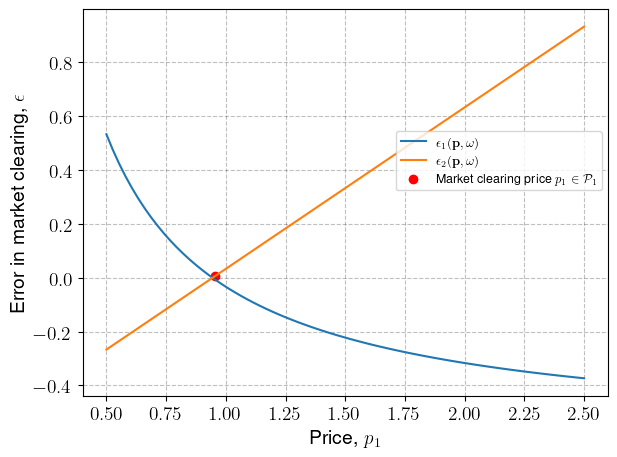

In [164]:
fig,ax = plt.subplots(tight_layout=True)
ax.plot(P_1, eps_1, label=r'$\epsilon_1(\mathbf{p}, \boldmath{\omega})$')
ax.plot(P_1, eps_2, label=r'$\epsilon_2(\mathbf{p}, \boldmath{\omega})$')
ax.scatter(market_clearing_p, min_err2, color='r', label=r'Market clearing price  $p_1 \in \mathcal{P}_1$')
ax.set_ylabel(r'Error in market clearing, $\epsilon$')
ax.set_xlabel(r'Price, $p_1$')
ax.legend(loc='upper right', bbox_to_anchor=(1,.7), fontsize=9)
print(f'Market clearing price p_1 in P_1 is {market_clearing_p.round(4)} with error {min_err2.round(4)}')
print(f'"Analytical" market clearing price is {market_clearing_p_analytical.round(4)} with error {min_err_analytical.round(4)}')

4a. Finding the allocation if only prices in $\mathcal{P_1}$ can be chosen, assuming that A chooses the price:

In [195]:
# Price vector
P_1 = np.linspace(0.5,2.5,N+1)

# What is the demand from A, given price vector
x_a1, x_a2=model.demand_A(P_1)

# What is the corresponding utility given each allocation
util_a=model.utility_A(x_a1,x_a2)
util_a_max=util_a.max()

# Give me the indices of my utility vector, same indicies in price vector
ids_util_a_max = util_a==util_a_max

# Price that maximizes utility for A
price_util_max_a=P_1[ids_util_a_max][0]

# Corresponding allocation
x_b1,x_b2=model.demand_B(price_util_max_a)

# Summing up
print(f'Price in P_1 that maximizes As utility: {price_util_max_a} \n This gives the allocation {model.demand_A(price_util_max_a)}.')

Price in P_1 that maximizes As utility: 2.5 
 This gives the allocation (0.30666666666666664, 1.5333333333333334).


4b. Finding the allocation if any positive price can be chosen

In [212]:
# Price vector - monotocity ensures consistent result
P_2 = np.linspace(0.1,10000,1000)

# What is the demand from A, given price vector
x_a1, x_a2=model.demand_A(P_2)

# What is the corresponding utility given each allocation
util_a=model.utility_A(x_a1,x_a2)
util_a_max=util_a.max()

# Give me the indices of my utility vector, same indicies in price vector
ids_util_a_max = util_a==util_a_max

# Price that maximizes utility for A
price_util_max_a=P_2[ids_util_a_max][0]

# Corresponding allocation
x_b1,x_b2=model.demand_B(price_util_max_a)

# Summing up
print(f'Price in P_2 that maximizes As utility: {price_util_max_a} \n This gives the allocation {model.demand_A(price_util_max_a)}. \n  Thus, given monotocity, A would choose an ever increasing price \n to maximize his/her utility and allocate fully towards x_a2.')

Price in P_2 that maximizes As utility: 10000.0 
 This gives the allocation (0.2666766666666666, 5333.533333333334). 
  Thus, given monotocity, A would choose an ever increasing price 
 to maximize his/her utility and allocate fully towards x_a2.


5a. Finding the allocation if the choice set is restricted to $\mathcal{C}$.